In [1]:
import os
import cv2

In [2]:
UTKFacePath = "\UTKFace"
imageList = []
genderList = []
for image in os.listdir(UTKFacePath):
    data = image.split("_")
    img = cv2.imread(UTKFacePath+"\\"+image)
    img = cv2.resize(img,(65,65))
    img = cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
    imageList.append(img.flatten())
    if int(data[0]) <= 12 :
        genderList.append(0)
    elif int(data[1]) == 0 :
        genderList.append(1)
    elif int(data[1]) == 1 :
        genderList.append(2)
    else : print("Empty")
print(len(imageList),len(genderList))

23699 23699


# --------------------------------

In [3]:
face_age_male = "/Validation/male"
for image in os.listdir(face_age_male):
    img = cv2.imread(face_age_male+"/"+image)
    img = cv2.resize(img,(100,100))
    img = cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
    imageList.append(img.flatten())
    genderList.append(1)
print(len(imageList),len(genderList))

52474 52474


# ------------------------------------------------------

In [4]:
face_age_female = "/Validation/female"
for image in os.listdir(face_age_female):
    img = cv2.imread(face_age_female+"/"+image)
    img = cv2.resize(img,(100,100))
    img = cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
    imageList.append(img.flatten())
    genderList.append(2)
print(len(imageList),len(genderList))

82329 82329


In [ ]:
autistic_Path = "non_autistic"
for image in os.listdir(autistic_Path):
    img = cv2.imread(autistic_Path+"/"+image)
    img = cv2.resize(img,(100,100))
    img = cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
    imageList.append(img.flatten())
    genderList.append(0)
print(len(imageList),len(genderList))

In [9]:
face_age_kids = "/age_prediction/train"
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades+'haarcascade_frontalface_default.xml')
for file in os.listdir(face_age_kids):
    if int(file) <= 12 :
        for image in os.listdir(face_age_kids+'/'+file):
            img = cv2.imread(face_age_kids+"/"+file+"/"+image)
            img = cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
            img = cv2.resize(img,(65,65))
            imageList.append(img.flatten())
            genderList.append(0)
print(len(imageList),len(genderList))

25197 25197


In [10]:
autistic_Path = "/consolidated/non_autistic"
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades+'haarcascade_frontalface_default.xml')

for image in os.listdir(autistic_Path):
    img = cv2.imread(autistic_Path+"/"+image)
    img = cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
    # faces = face_cascade.detectMultiScale(img, 1.3, 5)
    # if image == '131720.jpg': print(img.shape)
    # for (x, y, w, h) in faces:
        # try:
    # img = img[y:y+h,x:x+w]
    img = cv2.resize(img,(65,65))
    imageList.append(img.flatten())
    genderList.append(0)
        # except: None
        # finally:None
print(len(imageList),len(genderList))

25642 25642


(array([ 3404.,     0.,     0.,     0.,     0., 10784.,     0.,     0.,
            0.,  9511.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <BarContainer object of 10 artists>)

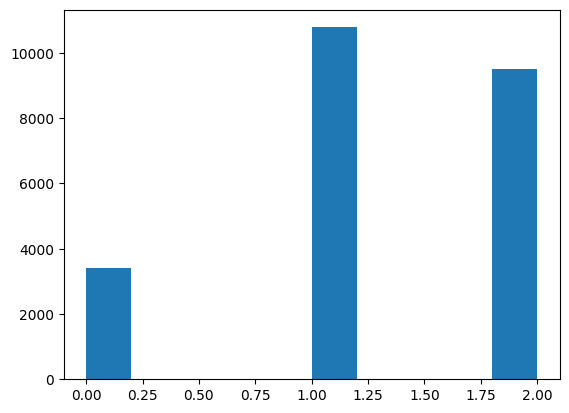

In [3]:
import matplotlib.pyplot as plt

plt.hist(genderList)

In [8]:
import numpy as np
from sklearn.decomposition import PCA


# Load the image data as a 4D array of shape (n_samples, height, width, channels)
X =np.array(imageList)

# Flatten the image data into a 2D array of shape (n_samples, n_features)
X = np.reshape(X, (X.shape[0], -1))


# Apply PCA to reduce the dimensionality of the data
pca = PCA(n_components=50)
X_pca = pca.fit_transform(X)

print(X_pca.shape)

(64995, 50)


In [4]:
from sklearn.model_selection import train_test_split
from sklearnex import patch_sklearn
from sklearnex.svm import SVC

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(imageList, genderList, test_size=0.3, random_state=42)
# X_train = imageList
# y_train = genderList

# Enable Intel optimizations for scikit-learn
patch_sklearn()

# Create an instance of IntSVC
clf = SVC(kernel='rbf', C=1.0, gamma='scale')

# Fit the model on the training data
clf.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = clf.predict(X_test)

# Evaluate the model performance
score = clf.score(X_test, y_test)
print(f"Accuracy: {score}")

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


Accuracy: 0.8751054852320675


In [5]:
import pickle

with open('model_svc.pkl', 'wb') as f:
    pickle.dump(clf, f)

In [88]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt


cm = confusion_matrix(y_test, y_pred)
# plt.figure(figsize=(20,20))
# sns.heatmap(cm, annot=True, cmap="Blues")
# plt.title("Confusion Matrix")
# plt.xlabel("Predicted Labels")
# plt.ylabel("True Labels")
# plt.show()
print(cm)

[[ 1258   245   366]
 [   44 10934   905]
 [  102  1317 10416]]


In [78]:
import cv2
import matplotlib.pyplot as plt

imagePath = "Images/8.jpg"
# imagePath = "C:\\Users\\ayoub\\Desktop\\age_prediction\\train\\090\\488.jpg"
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades+'haarcascade_frontalface_default.xml')
img = cv2.imread(imagePath)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
faces = face_cascade.detectMultiScale(gray, 1.3, 5)
for (x, y, w, h) in faces:
    face = img[y:y+h,x:x+w]
    face = cv2.resize(face,(40,40))
    face = cv2.cvtColor(face,cv2.COLOR_RGB2GRAY)
    face = face.flatten()
    result = clf.predict([face])
    if result == 1 : result = 'Male'
    elif result == 2 : result = 'Female'
    else :result = 'Kid'
    cv2.rectangle(img, (x, y), (x+w, y+h), (0, 255, 0), 2)
    font = cv2.FONT_HERSHEY_SIMPLEX
    fontScale = 1
    org = (x, y-30)
    color = (0, 255, 0)
    thickness = 1
    cv2.putText(img, str(result), org, font, fontScale, color, thickness)
cv2.imshow('Image',img)
cv2.waitKey(0)
cv2.destroyAllWindows()